In [1]:
from qiskit import IBMQ 

In [2]:
IBMQ.enable_account('f36ee70cf2ac474adb2005ccd48f0334019d4b78c0390e7f699938dd20398139582231fd01573b4f69b162e711353c453979831799e374db64acc60c1e301b42')
IBMQ.save_account('f36ee70cf2ac474adb2005ccd48f0334019d4b78c0390e7f699938dd20398139582231fd01573b4f69b162e711353c453979831799e374db64acc60c1e301b42', overwrite=True)

In [3]:
IBMQ.stored_accounts()

[{'token': 'f36ee70cf2ac474adb2005ccd48f0334019d4b78c0390e7f699938dd20398139582231fd01573b4f69b162e711353c453979831799e374db64acc60c1e301b42',
  'url': 'https://quantumexperience.ng.bluemix.net/api'}]

In [4]:
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [5]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

In [6]:
from qiskit.tools.visualization import plot_histogram

In [9]:
q = QuantumRegister(1)
c=ClassicalRegister(1)

In [10]:

qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c,0)
qc.measure(q,c)
qc.draw()

In [13]:
# # Create a Quantum Register with 3 qubits.
# q = QuantumRegister(3, 'q')


# # Create a Quantum Circuit acting on the q register
# circ = QuantumCircuit(q)
# # Create a Classical Register with 3 bits.
# # Add a H gate on qubit 0, putting this qubit in superposition.
# circ.h(q[0])
# # Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# # the qubits in a Bell state.
# circ.cx(q[0], q[1])
# # Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# # the qubits in a GHZ state.
# circ.cx(q[0], q[2])
# # circ.reset(q[0])
# c = ClassicalRegister(3, 'c')
# # Create a Quantum Circuit
# meas = QuantumCircuit(q, c)
# meas.barrier(q)
# # map the quantum measurement to the classical bits
# meas.measure(q,c)

# # The Qiskit circuit object supports composition using
# # the addition operator.
# qc = circ+meas

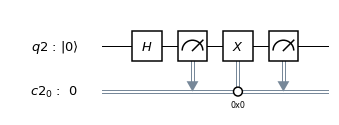

In [11]:
### drawing the circuit
qc.draw(output='mpl')

In [18]:
backend = IBMQ.get_backend('ibmq_16_melbourne')
backend

<IBMQBackend('ibmq_16_melbourne') from IBMQ()>

In [19]:
from qiskit.tools.monitor import job_monitor
shots = 5          # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions.

job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [16]:
result_exp = job_exp.result()

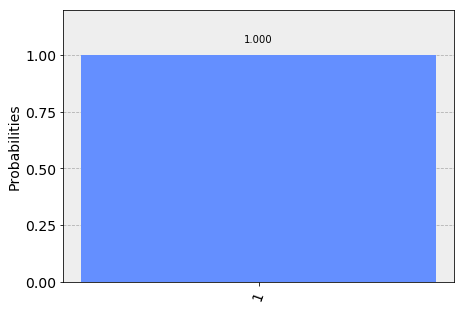

In [17]:
counts_exp = result_exp.get_counts(qc)
plot_histogram(counts_exp)